- graphs starting quantities at zero
- graph prettiness
- store pvalues 
- conversation about type 1 and 2 errors
- ANOVA tukey graph, talk about CI
- Bonferroni correction

<img src='images/Northwind_ERD_updated.png.'>

<a href='#1.0-Initial-Question'>**1.0 Initial Question**</a>

<a href='#1.1-Initial-Hypothesis'>**1.1 Initial Hypothesis**</a>
- <a href='#1.1.1-Null-Hypothesis'>1.1.1 Null Hypothesis</a>
- <a href='#1.1.2-Alternative-Hypothesis'>1.1.2 Alternative Hypothesis</a>
- <a href='#1.1.3-Features'>1.1.3 Features</a>
- <a href='#1.1.4-Target-Variable'>1.1.4 Target Variable</a>

<a href='#1.2-Methodology'>**1.2 Methodology**</a>
- <a href='#1.2.1-Obtain-Data'>1.2.1 Obtain Data</a>
- <a href='#1.2.2-Scrub-Data'>1.2.2 Scrub Data</a>
    - <a href='#1.2.2.1-Manage-n/a-data-types'>1.2.2.1 Manage n/a data types</a>
    - <a href='#1.2.2.2-Remove-duplicate-data'>1.2.2.2 Remove duplicate data</a>
    - <a href='#1.2.2.3-Manage-data-typs'>1.2.2.3 Manage data types</a>
    - <a href='#1.2.2.4-Remove-outliers'>1.2.2.4 Remove outliers</a>
- <a href='#1.2.3-Explore-Data'>1.2.3 Explore Data</a>
    - <a href='#1.2.3.1-Visualize-data'>1.2.3.1 Visualize data</a>
    - <a href='#1.2.3.2-Transform-data'>1.2.3.2 Transform data</a>
    - <a href='#1.2.3.3-Sort-data-/-Prepare-data-for-testing'>1.2.3.3 Sort data / Prepare data for testing</a>
    - <a href='#1.2.3.4-Develop-feature'>1.2.3.4 Develop Feature</a>
- <a href='#1.2.4-Model-Data'>1.2.4 Model Data</a>
    - <a href='#1.2.4.1-Check-for-data-normality'>1.2.4.1 Check for data normality</a>
    - <a href='#1.2.4.2-Standard-deviation-and-other-basic-statistics'>1.2.4.2 Standard deviation and other basic statistics</a>
    - <a href='#1.2.4.3-Statistical-test'>1.2.4.3 Statistical test</a>
    - <a href='#1.2.4.4-Verification-techniques'>1.2.4.4 Verification techniques</a>
        - <a href='#1.2.4.4.1-Nonparametric-testing-and-confirmatory-testing'>1.2.4.4.1 Nonparametric testing</a>
        - <a href='#1.2.4.4.2-Effect-size'>1.2.4.4.2 Effect size</a>
        - <a href='#1.2.4.4.3-Error'>1.2.4.4.3 Error</a>
- <a href='#1.2.5-Interpret-Model'>1.2.5 Interpret Model</a>
    - <a href='#1.2.5.1-Extension-of-acquired-knowledge'>1.2.5.1 Extension of acquired knowledge</a>
    
<a href='#1.3-Results'>**1.3 Results**</a>

<a href='#1.4-Conclusions'>**1.4 Conclusions**</a>

- <a href='#1.4.1-Actionable-Items-and-Insights'>1.4.1 Actionable Items and Insights</a>
- <a href='#1.4.2-Additional-Visuals'>1.4.2 Additional Visuals</a>

<a href='#1.5-Future-Work'>**1.5 Future Work**</a>

<a href='#1.6-References'>**1.6 References**</a>

# Question

### Which region is preforming the best? How can we optimize preformance?


# Hypothesis for Z-Test

### H0: no effect - Item total for specific regions is no different than that of all regions

### HA: effect - Item total for specific regions is different than that of all regions

The bolded items in the H0 statement represent the data that needs to be pulled down from the database. 

### Feature: RegionId
### Target: OrderDetail.Quantity * OrderDetail.UnitPrice

# Gathering data

### Importing the data

In [1]:
import pandas as pd
import sqlite3

import numpy as np
from numpy import std, mean, sqrt
import scipy.stats as stats
from statsmodels.stats.power import tt_ind_solve_power
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium

idx = pd.IndexSlice

### Setting up the connection with the database

In [2]:
conn = sqlite3.Connection('Northwind_small.sqlite')
cur = conn.cursor()

### Looking at the necessary data

In [3]:
cur.execute("""SELECT *
               FROM Territory
               """)
territory = pd.DataFrame(cur.fetchall())
territory.columns = [x[0] for x in cur.description]
territory.head()

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [4]:
cur.execute("""SELECT *
               FROM EmployeeTerritory
               """)
employeeTerritory = pd.DataFrame(cur.fetchall())
employeeTerritory.columns = [x[0] for x in cur.description]
employeeTerritory.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [5]:
cur.execute("""SELECT *
               FROM Employee
               """)
employee = pd.DataFrame(cur.fetchall())
employee.columns = [x[0] for x in cur.description]
employee.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [6]:
cur.execute("""SELECT *
               FROM 'Order'
               """)
order = pd.DataFrame(cur.fetchall())
order.columns = [x[0] for x in cur.description]
order.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [7]:
cur.execute("""SELECT *
               FROM OrderDetail
               """)
orderDetail = pd.DataFrame(cur.fetchall())
orderDetail.columns = [x[0] for x in cur.description]
orderDetail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [8]:
cur.execute("""SELECT Territory.Id as TerritoryId, RegionId, EmployeeTerritory.EmployeeId, Employee.Region, 'Order'.Id, OrderDetail.ProductId, UnitPrice*Quantity as ItemTotal, UnitPrice, Quantity
               FROM Territory
               LEFT JOIN EmployeeTerritory ON Territory.Id = EmployeeTerritory.TerritoryId
               JOIN Employee on EmployeeTerritory.EmployeeId = Employee.Id
               JOIN 'Order' on Employee.Id = 'Order'.EmployeeId
               JOIN OrderDetail on 'Order'.Id = OrderDetail.OrderId
               """)
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,TerritoryId,RegionId,EmployeeId,Region,Id,ProductId,ItemTotal,UnitPrice,Quantity
0,02903,1,5,British Isles,10248,11,168.0,14.00,12
1,07960,1,5,British Isles,10248,11,168.0,14.00,12
2,08837,1,5,British Isles,10248,11,168.0,14.00,12
3,10019,1,5,British Isles,10248,11,168.0,14.00,12
4,10038,1,5,British Isles,10248,11,168.0,14.00,12
...,...,...,...,...,...,...,...,...,...
10124,19713,1,1,North America,11077,73,30.0,15.00,2
10125,06897,1,1,North America,11077,75,31.0,7.75,4
10126,19713,1,1,North America,11077,75,31.0,7.75,4
10127,06897,1,1,North America,11077,77,26.0,13.00,2


# Scrub Data

The following scrubbing techniques were applied to the original data:
- Manage n/a data types
- Delete duplicate rows
- Correct data types
- Find outliers

### Manage n/a data types

In [9]:
# nans identification
print(len(df))
df.isna().sum()

10129


TerritoryId    0
RegionId       0
EmployeeId     0
Region         0
Id             0
ProductId      0
ItemTotal      0
UnitPrice      0
Quantity       0
dtype: int64

### Delete duplicate data

In [10]:
# identification of duplicate data
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 0


In [11]:
# code to drop duplicate row if necessary
df.drop_duplicates(inplace=True)
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 0


### Correct data types

First, let's see what the data types for this data set are.

In [12]:
# data type identification
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10128
Data columns (total 9 columns):
TerritoryId    10129 non-null object
RegionId       10129 non-null int64
EmployeeId     10129 non-null int64
Region         10129 non-null object
Id             10129 non-null int64
ProductId      10129 non-null int64
ItemTotal      10129 non-null float64
UnitPrice      10129 non-null float64
Quantity       10129 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 791.3+ KB


In [13]:
df.TerritoryId.unique()

array(['02903', '07960', '08837', '10019', '10038', '11747', '14450',
       '85014', '85251', '98004', '98052', '98104', '20852', '27403',
       '27511', '30346', '31406', '32859', '33607', '03049', '03801',
       '48075', '48084', '48304', '55113', '55439', '06897', '19713',
       '19428', '44122', '45839', '53404', '01581', '01730', '01833',
       '02116', '02139', '02184', '40222', '60179', '60601', '80202',
       '80909', '90405', '94025', '94105', '95008', '95054', '95060'],
      dtype=object)

In [14]:
df['TerritoryId'] = df['TerritoryId'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10128
Data columns (total 9 columns):
TerritoryId    10129 non-null int32
RegionId       10129 non-null int64
EmployeeId     10129 non-null int64
Region         10129 non-null object
Id             10129 non-null int64
ProductId      10129 non-null int64
ItemTotal      10129 non-null float64
UnitPrice      10129 non-null float64
Quantity       10129 non-null int64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 751.8+ KB


In [15]:
df.Region.unique()

array(['British Isles', 'North America'], dtype=object)

In [16]:
df['Region'] = ['British_Isles' if x == 'British Isles' else 'North_America' for x in df['Region']]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10128
Data columns (total 9 columns):
TerritoryId    10129 non-null int32
RegionId       10129 non-null int64
EmployeeId     10129 non-null int64
Region         10129 non-null object
Id             10129 non-null int64
ProductId      10129 non-null int64
ItemTotal      10129 non-null float64
UnitPrice      10129 non-null float64
Quantity       10129 non-null int64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 751.8+ KB


In [18]:
df.Region.unique()

array(['British_Isles', 'North_America'], dtype=object)

In [19]:
df['Region'] = [str(x) for x in df['Region']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10128
Data columns (total 9 columns):
TerritoryId    10129 non-null int32
RegionId       10129 non-null int64
EmployeeId     10129 non-null int64
Region         10129 non-null object
Id             10129 non-null int64
ProductId      10129 non-null int64
ItemTotal      10129 non-null float64
UnitPrice      10129 non-null float64
Quantity       10129 non-null int64
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 751.8+ KB


In [20]:
df.columns

Index(['TerritoryId', 'RegionId', 'EmployeeId', 'Region', 'Id', 'ProductId',
       'ItemTotal', 'UnitPrice', 'Quantity'],
      dtype='object')

### Find outliers

In [21]:
# outlier identification
pass

In [22]:
# management of outliers
pass

Observations about data types

# Explore Data

For a quick preview of what we have to work with, we'll use the describe method.

In [23]:
# describe data
df.describe()

,TerritoryId,RegionId,EmployeeId,Id,ProductId,ItemTotal,UnitPrice,Quantity
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,39445.883503,1.990226,4.884194,10663.762563,40.567874,661.287053,26.519361,24.343963
std,32149.598006,1.060010,2.468345,240.279728,22.098367,1122.766498,30.607125,19.410689
min,1581.000000,1.000000,1.000000,10248.000000,1.000000,4.800000,2.000000,1.000000
25%,10038.000000,1.000000,3.000000,10460.000000,22.000000,156.150000,12.000000,10.000000
50%,31406.000000,2.000000,5.000000,10659.000000,41.000000,372.000000,18.400000,20.000000
75%,60179.000000,3.000000,7.000000,10869.000000,60.000000,733.600000,32.800000,30.000000
max,98104.000000,4.000000,9.000000,11077.000000,77.000000,15810.000000,263.500000,130.000000


Observations about df.describe()

### Visualize data

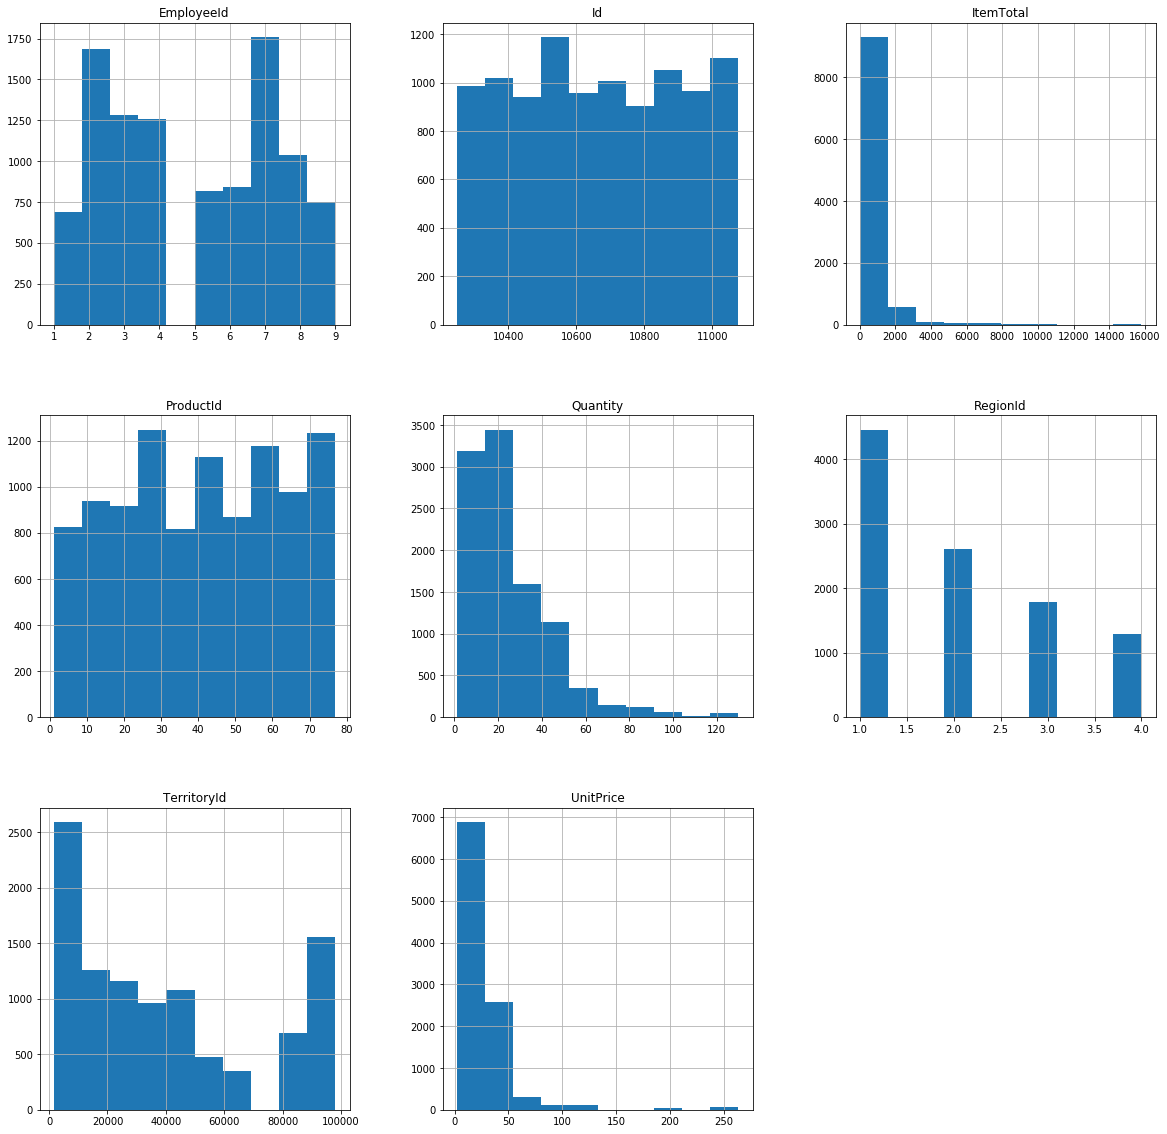

In [24]:
# visualize data
df.hist(figsize=(20,20));

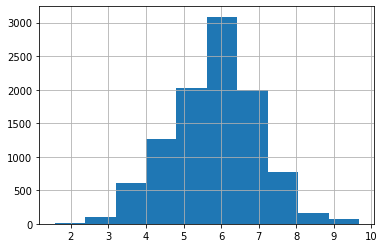

In [25]:
log = df.copy(deep=True)
log['ItemTotal'] = df['ItemTotal'].map(lambda x: np.log(x))
log.ItemTotal.hist()

### Sort data

Plan and justification of sorting data

In [26]:
# sort data
pass

Observations about sorted data

### Develop feature

In [27]:
# create features
pass

# Model Data
Below is the model after scrubbing and exploring have been managed, let's see what the model picks up.

### Data normality

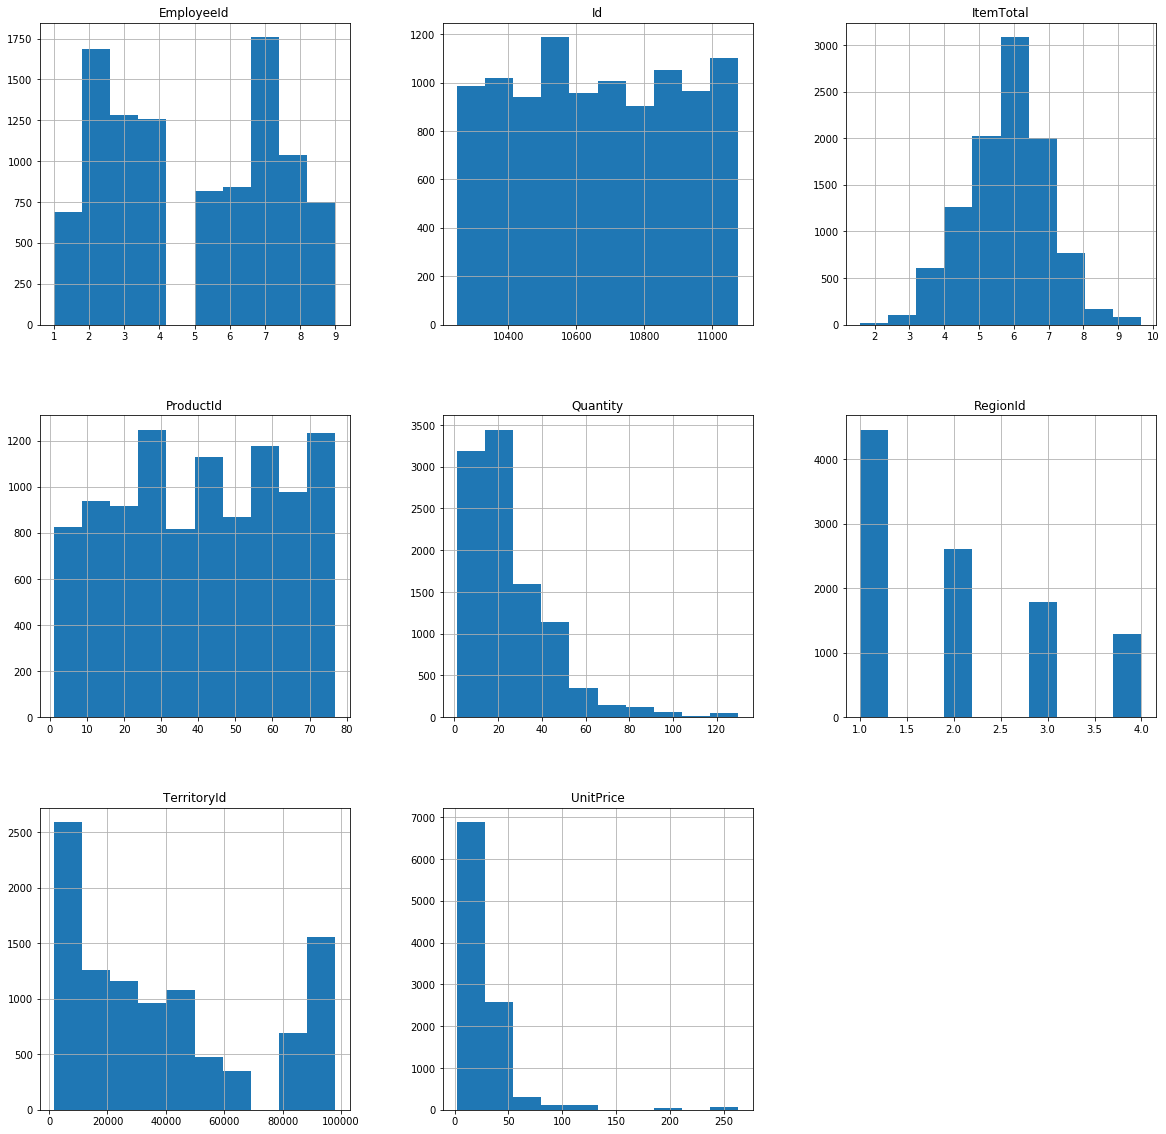

In [28]:
# visual/code for data normality
log.hist(figsize=(20,20));

### Standard deviation

In [29]:
# standard deviation for target variable
print('ItemTotal Population Measures of Variance')
print('numbers of samples: ' + str(len(log['ItemTotal'])))
print('population mean: ' + str(mean(log['ItemTotal'])))
print('population standard deviation: ' + str(std(log['ItemTotal'])))
print('population variance: ' + str(std(log['ItemTotal'])**2))
print('skew: ' + str(log['ItemTotal'].skew()))

ItemTotal Population Measures of Variance
numbers of samples: 10129
population mean: 5.82235979429891
population standard deviation: 1.165811275166423
population variance: 1.3591159293051611
skew: -0.09461385082007663


### Basic testing

In [30]:
# set up variables for this particular test
alpha = 0.05
territoryId = [log[log['TerritoryId'] == x] for x in log['TerritoryId'].unique()]
len(territoryId)
x_bar_pop = log.ItemTotal.mean()
x_bar_sample = [x['ItemTotal'].mean() for x in territoryId]
sigma_pop = log.ItemTotal.std()
sigma_sample = [x['ItemTotal'].std() for x in territoryId]
n_pop = len(log.ItemTotal)
n_sample = [len(x['ItemTotal']) for x in territoryId]
mu_pop = mu_sample = 100
dof = [x-1 for x in n_sample]

In [31]:
# test
x_bar = np.array([x_bar_pop - i for i in x_bar_sample])
sigma = np.array([i**2 for i in sigma_sample])
sigma_per_sample = sigma / n_sample
t = ((x_bar) - (mu_pop-mu_sample)) / np.sqrt((sigma_pop**2/n_pop) + (sigma_per_sample))
dof_t = pd.DataFrame()
dof_t['dof'] = dof
dof_t['t'] = t

In [32]:
# result
p_value = 1-stats.t.cdf(dof_t['t'], dof_t['dof'])
p_value

array([0.72187205, 0.72187205, 0.72187205, 0.72187205, 0.72187205,
       0.72187205, 0.72187205, 0.00686218, 0.00686218, 0.00686218,
       0.00686218, 0.00686218, 0.27060678, 0.27060678, 0.27060678,
       0.71619506, 0.71619506, 0.71619506, 0.71619506, 0.71759218,
       0.71759218, 0.71759218, 0.71759218, 0.71759218, 0.71759218,
       0.71759218, 0.00880333, 0.00880333, 0.21202311, 0.21202311,
       0.21202311, 0.21202311, 0.68476546, 0.68476546, 0.68476546,
       0.68476546, 0.68476546, 0.68476546, 0.68476546, 0.85751959,
       0.85751959, 0.85751959, 0.85751959, 0.85751959, 0.85751959,
       0.85751959, 0.85751959, 0.85751959, 0.85751959])

In [ ]:
# bonferroni correction

In [33]:
# evaluation of result
for x,y in enumerate(p_value):
    if alpha > y:
        print(str(x) + ': Reject the null hypothesis')
    else:
        print(str(x) + ': Fail to reject the null hypothesis')

0: Fail to reject the null hypothesis
1: Fail to reject the null hypothesis
2: Fail to reject the null hypothesis
3: Fail to reject the null hypothesis
4: Fail to reject the null hypothesis
5: Fail to reject the null hypothesis
6: Fail to reject the null hypothesis
7: Reject the null hypothesis
8: Reject the null hypothesis
9: Reject the null hypothesis
10: Reject the null hypothesis
11: Reject the null hypothesis
12: Fail to reject the null hypothesis
13: Fail to reject the null hypothesis
14: Fail to reject the null hypothesis
15: Fail to reject the null hypothesis
16: Fail to reject the null hypothesis
17: Fail to reject the null hypothesis
18: Fail to reject the null hypothesis
19: Fail to reject the null hypothesis
20: Fail to reject the null hypothesis
21: Fail to reject the null hypothesis
22: Fail to reject the null hypothesis
23: Fail to reject the null hypothesis
24: Fail to reject the null hypothesis
25: Fail to reject the null hypothesis
26: Reject the null hypothesis
27: R

In [34]:
# For Region's 7, 8, 9, 10, 11, 26, 27
territory_85014 = territoryId[7]
territory_85251 = territoryId[8]
territory_98004 = territoryId[9]
territory_98052 = territoryId[10]
territory_98104 = territoryId[11]
territory_06897 = territoryId[26]
territory_19713 = territoryId[27]

In [36]:
territory_85014

,TerritoryId,RegionId,EmployeeId,Region,Id,ProductId,ItemTotal,UnitPrice,Quantity
21,85014,2,6,British_Isles,10249,14,5.120386,18.60,9
26,85014,2,6,British_Isles,10249,51,7.436028,42.40,40
209,85014,2,6,British_Isles,10264,2,6.276643,15.20,35
214,85014,2,6,British_Isles,10264,41,5.260096,7.70,25
272,85014,2,6,British_Isles,10271,33,3.871201,2.00,24
...,...,...,...,...,...,...,...,...,...
9519,85014,2,6,British_Isles,11031,24,4.548600,4.50,21
9524,85014,2,6,British_Isles,11031,64,6.499787,33.25,20
9529,85014,2,6,British_Isles,11031,71,5.840642,21.50,16
9682,85014,2,6,British_Isles,11045,33,3.624341,2.50,15


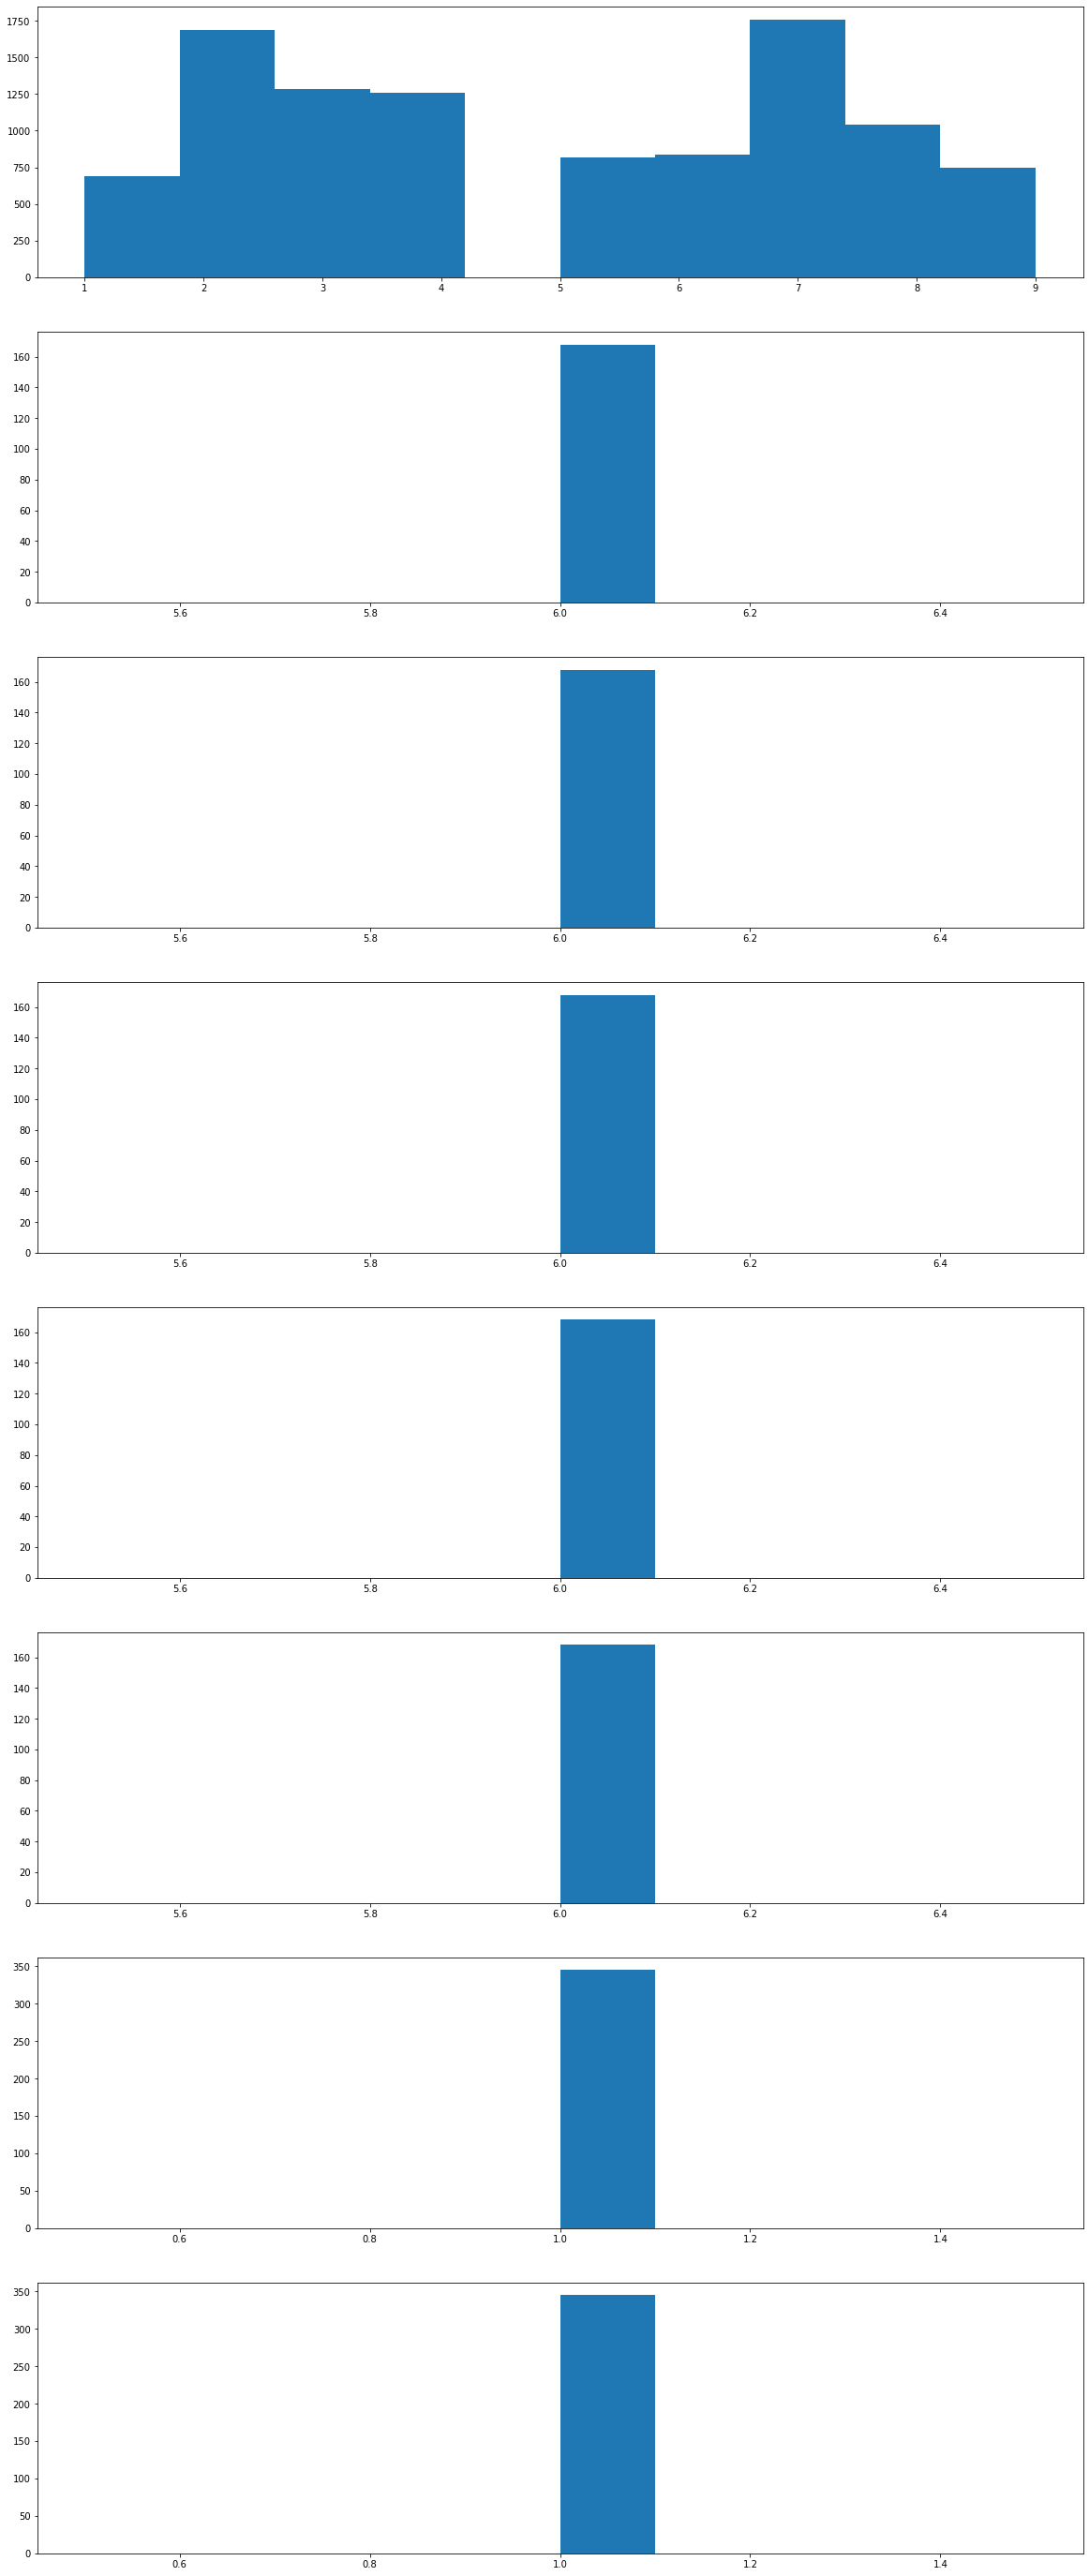

In [37]:
fig00 = plt.figure(figsize=(20,50))
ax = fig00.add_subplot(811)
ax1 = plt.hist(log['EmployeeId'])
ax = fig00.add_subplot(812)
ax2 = plt.hist(territory_85014['EmployeeId'])
ax = fig00.add_subplot(813)
ax3 = plt.hist(territory_85251['EmployeeId'])
ax = fig00.add_subplot(814)
ax4 = plt.hist(territory_98004['EmployeeId'])
ax = fig00.add_subplot(815)
ax5 = plt.hist(territory_98052['EmployeeId'])
ax = fig00.add_subplot(816)
ax6 = plt.hist(territory_98104['EmployeeId'])
ax = fig00.add_subplot(817)
ax7 = plt.hist(territory_06897['EmployeeId'])
ax = fig00.add_subplot(818)
ax8 = plt.hist(territory_19713['EmployeeId']);

In [38]:
data_to_join = [territory_85014, territory_85251, territory_98004, territory_98052, 
                territory_98104, territory_06897, territory_19713]
different = pd.concat(data_to_join)
different

,TerritoryId,RegionId,EmployeeId,Region,Id,ProductId,ItemTotal,UnitPrice,Quantity
21,85014,2,6,British_Isles,10249,14,5.120386,18.60,9
26,85014,2,6,British_Isles,10249,51,7.436028,42.40,40
209,85014,2,6,British_Isles,10264,2,6.276643,15.20,35
214,85014,2,6,British_Isles,10264,41,5.260096,7.70,25
272,85014,2,6,British_Isles,10271,33,3.871201,2.00,24
...,...,...,...,...,...,...,...,...,...
10120,19713,1,1,North_America,11077,64,4.197202,33.25,2
10122,19713,1,1,North_America,11077,66,2.833213,17.00,1
10124,19713,1,1,North_America,11077,73,3.401197,15.00,2
10126,19713,1,1,North_America,11077,75,3.433987,7.75,4


In [39]:
territory['Id']

0     01581
1     01730
2     01833
3     02116
4     02139
5     02184
6     02903
7     03049
8     03801
9     06897
10    07960
11    08837
12    10019
13    10038
14    11747
15    14450
16    19428
17    19713
18    20852
19    27403
20    27511
21    29202
22    30346
23    31406
24    32859
25    33607
26    40222
27    44122
28    45839
29    48075
30    48084
31    48304
32    53404
33    55113
34    55439
35    60179
36    60601
37    72716
38    75234
39    78759
40    80202
41    80909
42    85014
43    85251
44    90405
45    94025
46    94105
47    95008
48    95054
49    95060
50    98004
51    98052
52    98104
Name: Id, dtype: object

In [40]:
successful_territories = []
successful_territories.append(territory[territory['Id'] == '85014']['TerritoryDescription'])
successful_territories.append(territory[territory['Id'] == '85251']['TerritoryDescription'])
successful_territories.append(territory[territory['Id'] == '98004']['TerritoryDescription'])
successful_territories.append(territory[territory['Id'] == '98052']['TerritoryDescription'])
successful_territories.append(territory[territory['Id'] == '98104']['TerritoryDescription'])
successful_territories.append(territory[territory['Id'] == '06897']['TerritoryDescription'])
successful_territories.append(territory[territory['Id'] == '19713']['TerritoryDescription'])
successful_territories

[42    Phoenix
 Name: TerritoryDescription, dtype: object, 43    Scottsdale
 Name: TerritoryDescription, dtype: object, 50    Bellevue
 Name: TerritoryDescription, dtype: object, 51    Redmond
 Name: TerritoryDescription, dtype: object, 52    Seattle
 Name: TerritoryDescription, dtype: object, 9    Wilton
 Name: TerritoryDescription, dtype: object, 17    Neward
 Name: TerritoryDescription, dtype: object]

In [41]:
successful_cities = ['Phoenix', 'Scottsdale', 'Bellevue', 'Redmond', 'Seattle', 'Wilton', 'Neward']
len(successful_cities)

7

In [42]:
# map regions
successful_zips = [(33.448376,-112.074036), (33.494171,-111.926048), (47.610149,-122.201515), (47.673988,-122.121513),
                   (47.606209,-122.332069), (54.235130,-0.682000), (55.487810,-4.602750)]

# map generation
successful_zip_map = folium.Map(location=(59.136499, -27.829387), zoom_start = 2)

# addition of significant zipcode data
popup_phoenix = 'Phoenix'
marker_phoenix = folium.Marker(successful_zips[0], popup=popup_phoenix, icon=folium.Icon(color='green'))
popup_scottsdale = 'Scottsdale'
marker_scottsdale = folium.Marker(successful_zips[1], popup=popup_scottsdale, icon=folium.Icon(color='green'))
popup_Bellevue = 'Bellevue'
marker_Bellevue = folium.Marker(successful_zips[2], popup=popup_Bellevue, icon=folium.Icon(color='green'))
popup_Redmond = 'Redmond'
marker_Redmond = folium.Marker(successful_zips[3], popup=popup_Redmond, icon=folium.Icon(color='green'))
popup_Seattle = 'Seattle'
marker_Seattle = folium.Marker(successful_zips[4], popup=popup_Seattle, icon=folium.Icon(color='green'))
popup_Wilton = 'Wilton'
marker_Wilton = folium.Marker(successful_zips[5], popup=popup_Wilton, icon=folium.Icon(color='green'))
popup_Neward = 'Bellevue'
marker_Neward = folium.Marker(successful_zips[6], popup=popup_Neward, icon=folium.Icon(color='green'))

# populate zipcode data onto map
successful_zip_map.add_child(marker_phoenix)
successful_zip_map.add_child(marker_scottsdale)
successful_zip_map.add_child(marker_Bellevue)
successful_zip_map.add_child(marker_Redmond)
successful_zip_map.add_child(marker_Seattle)
successful_zip_map.add_child(marker_Wilton)
successful_zip_map.add_child(marker_Neward)

#save map
successful_zip_map.save('locations where item total is higher than everywhere else.html')

# display map
successful_zip_map

In [43]:
sm.stats.anova_lm(ols('ItemTotal ~ TerritoryId + RegionId + EmployeeId', data=different).fit())

,df,sum_sq,mean_sq,F,PR(>F)
TerritoryId,1.0,0.671189,0.671189,0.505824,0.477061
RegionId,1.0,0.017344,0.017344,0.013071,0.908992
EmployeeId,1.0,1.563854,1.563854,1.178556,0.277821
Residual,1527.0,2026.211658,1.326923,NaN,NaN


Summarize results and determine next steps. Might include verification of sample size, error types, non-parametric testing, or a deepening of understanding

### Verification techniques
#### Non-parametric testing

In [44]:
# non-parametric testing variables
pass

In [45]:
# non-parametric test
pass

In [46]:
# result
pass

In [47]:
# evaluation of results
pass

Oberservations based on new finding

#### Confirmatory Testing

In [48]:
# confirmatory test 
pass

Oberservations based on new finding

#### Effect size

In [49]:
# effect size variables
pass

In [50]:
# effect size test
def cohen_d_one_samp(x, mu0):
    mu = mean(x)
    sample_std = std(x, ddof=1)
    return (mu - mu0) / sample_std
def cohen_d_two_samp(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)
# effect_size = cohen_d_two_samp('', '')
# effect_size

Obeservations about effect size

#### Power and error

In [51]:
# power variables
pass

In [52]:
# power test

In [53]:
# evaluation of power test

Observations about power test

### Cross validatation

In [54]:
# test train split or resampling for testing preformed above
pass

### Extension of acquired knowledge
#### Deeper question
#### Hypothesis for deeper question

In [55]:
# deeper understanding variables
pass

In [56]:
# deeper understanding test
pass

In [57]:
# deeper understanding result
pass

In [58]:
# deeper understanding evaluation of result
pass

Observations based off of deeper understanding test

# Interpret

Conclusions about question overall commentary on hypothesis

### Additional visualizations

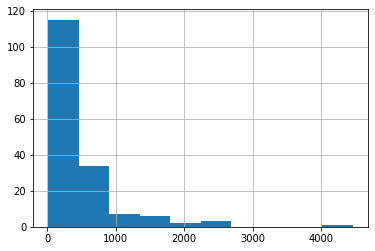

In [59]:
# visual for blah blah blah
df[df['TerritoryId'] == 85014]['ItemTotal'].hist()

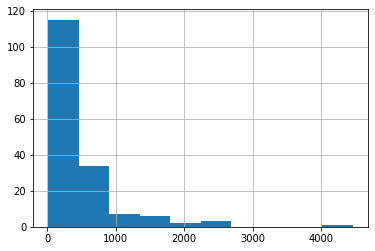

In [60]:
df[df['TerritoryId'] == 85251]['ItemTotal'].hist()

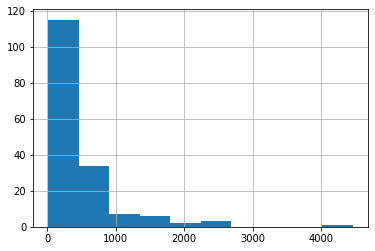

In [61]:
df[df['TerritoryId'] == 98004]['ItemTotal'].hist()

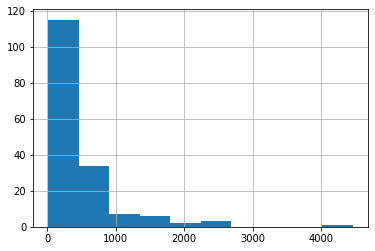

In [62]:
df[df['TerritoryId'] == 98052]['ItemTotal'].hist()

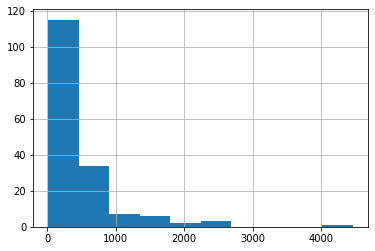

In [63]:
df[df['TerritoryId'] == 98104]['ItemTotal'].hist()

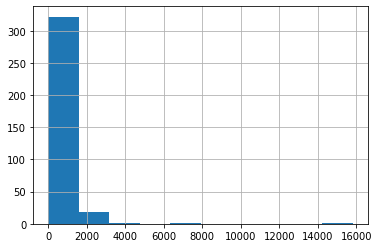

In [64]:
df[df['TerritoryId'] == 6897]['ItemTotal'].hist()

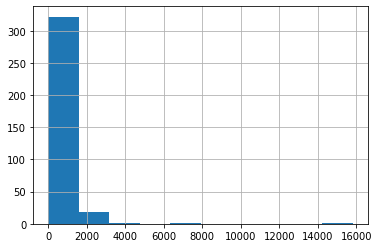

In [65]:
df[df['TerritoryId'] == 19713]['ItemTotal'].hist()

In [66]:
employee[employee['Id'] == 6]

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp


In [67]:
employee[employee['Id'] == 1]

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp


In [68]:
employee_work = df.groupby(['EmployeeId', 'Id', 'ProductId']).mean()

In [69]:
employee_id = df['EmployeeId'].unique()

In [70]:
employee_work.columns

Index(['TerritoryId', 'RegionId', 'ItemTotal', 'UnitPrice', 'Quantity'], dtype='object')

In [71]:
employee_work.index

MultiIndex([(1, 10258,  2),
            (1, 10258,  5),
            (1, 10258, 32),
            (1, 10270, 36),
            (1, 10270, 43),
            (1, 10275, 24),
            (1, 10275, 59),
            (1, 10285,  1),
            (1, 10285, 40),
            (1, 10285, 53),
            ...
            (9, 11016, 31),
            (9, 11016, 36),
            (9, 11017,  3),
            (9, 11017, 59),
            (9, 11017, 70),
            (9, 11022, 19),
            (9, 11022, 69),
            (9, 11058, 21),
            (9, 11058, 60),
            (9, 11058, 61)],
           names=['EmployeeId', 'Id', 'ProductId'], length=2155)

In [72]:
employee_work.loc[idx[1]]

TerritoryId  RegionId  ItemTotal  UnitPrice  Quantity
Id    ProductId                                                       
10258 2              13305.0         1      760.0      15.20        50
      5              13305.0         1     1105.0      17.00        65
      32             13305.0         1      153.6      25.60         6
10270 36             13305.0         1      456.0      15.20        30
      43             13305.0         1      920.0      36.80        25
...                      ...       ...        ...        ...       ...
11077 64             13305.0         1       66.5      33.25         2
      66             13305.0         1       17.0      17.00         1
      73             13305.0         1       30.0      15.00         2
      75             13305.0         1       31.0       7.75         4
      77             13305.0         1       26.0      13.00         2

[345 rows x 5 columns]

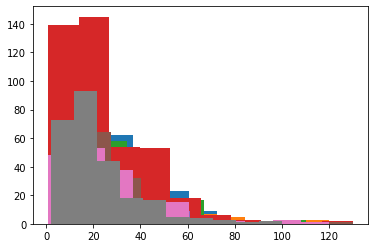

In [73]:
[plt.hist(employee_work.loc[idx[x]]['Quantity'], label=x) for x in range(1,9)];

In [74]:
x = [employee_work.loc[idx[i]]['Quantity'] for i in range(1,9)]
x

[Id     ProductId
 10258  2            50
        5            65
        32            6
 10270  36           30
        43           25
                     ..
 11077  64            2
        66            1
        73            2
        75            4
        77            2
 Name: Quantity, Length: 345, dtype: int64, Id     ProductId
 10265  17           30
        70           20
 10277  28           20
        62           12
 10280  24           12
                     ..
 11070  2            20
        16           30
        31           20
 11073  11           10
        24           20
 Name: Quantity, Length: 241, dtype: int64, Id     ProductId
 10251  22            6
        57           15
        65           20
 10253  31           20
        39           42
                     ..
 11052  61           10
 11057  70            3
 11063  34           30
        40           40
        41           30
 Name: Quantity, Length: 321, dtype: int64, Id     ProductId
 10250 

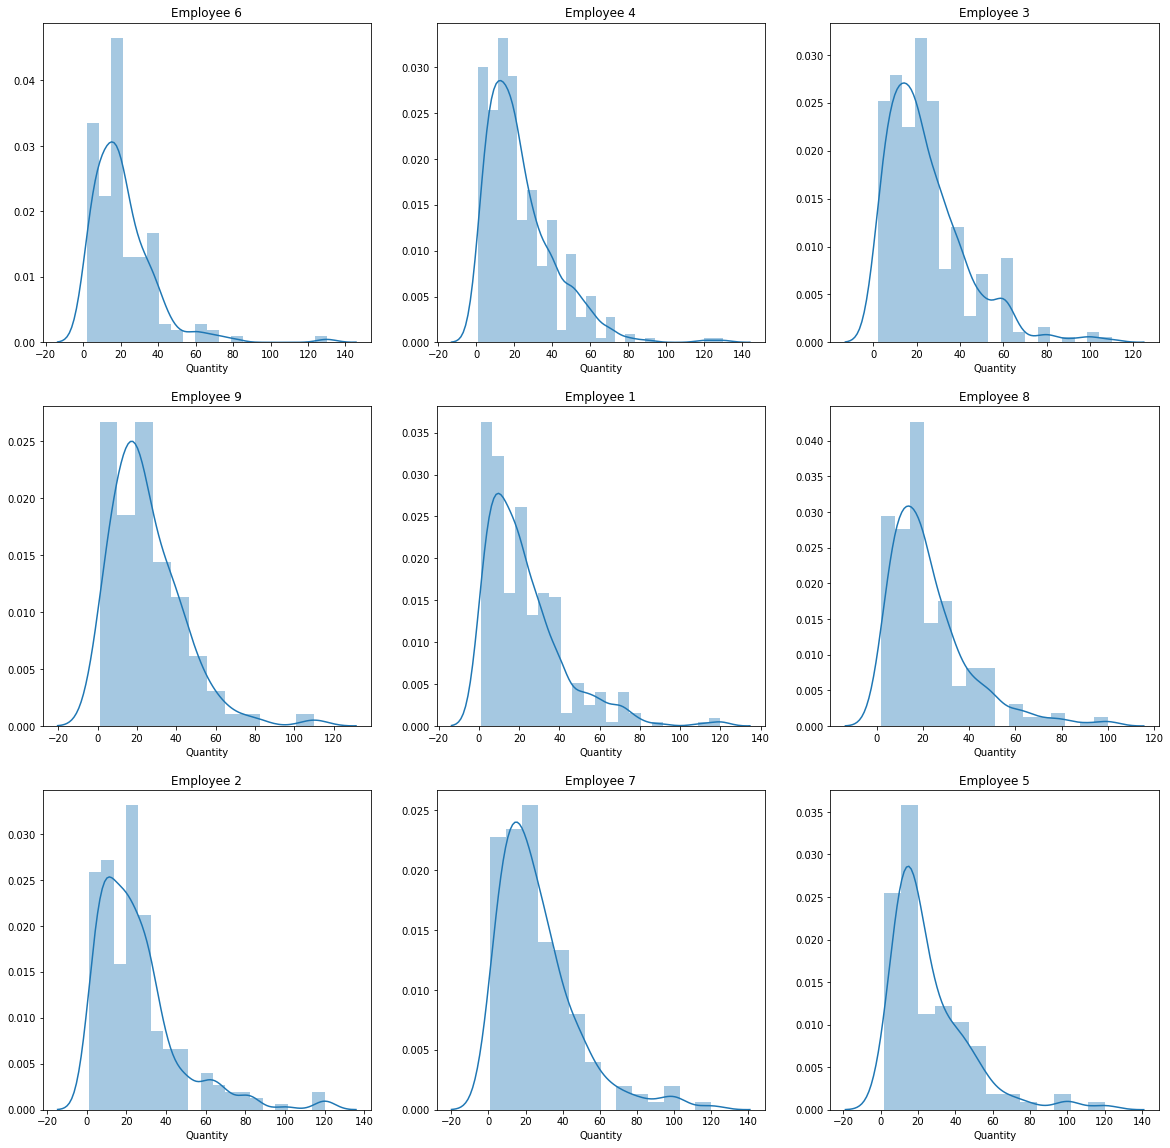

In [75]:
x = [employee_work.loc[idx[i]]['Quantity'] for i in employee_id]
fig00, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
for n in range(0, len(employee_id)):
    row = (n-1)//3
    col = n%3-1
    ax = axes[row][col]
    sns.distplot(x[n], ax=ax)
    ax.set_title('Employee {}'.format(employee_id[n]))

(array([134.,  87.,  62.,  23.,  23.,   9.,   3.,   1.,   0.,   3.]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]),
 <a list of 10 Patch objects>)

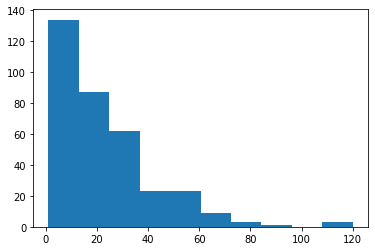

In [76]:
plt.hist(employee_work.loc[idx[1]]['Quantity'])

(array([79., 66., 54., 13., 13.,  7.,  5.,  0.,  1.,  3.]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]),
 <a list of 10 Patch objects>)

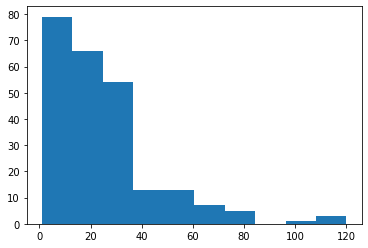

In [77]:
plt.hist(employee_work.loc[idx[2]]['Quantity'])

(array([97., 88., 58., 40., 13., 17.,  1.,  3.,  1.,  3.]),
 array([  2. ,  12.8,  23.6,  34.4,  45.2,  56. ,  66.8,  77.6,  88.4,
         99.2, 110. ]),
 <a list of 10 Patch objects>)

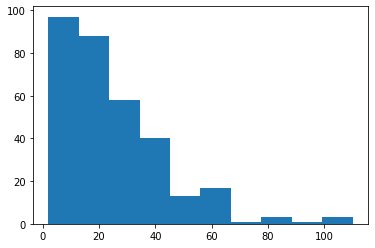

In [78]:
plt.hist(employee_work.loc[idx[3]]['Quantity'])

(array([139., 145.,  54.,  53.,  18.,   6.,   3.,   0.,   0.,   2.]),
 array([  1. ,  13.9,  26.8,  39.7,  52.6,  65.5,  78.4,  91.3, 104.2,
        117.1, 130. ]),
 <a list of 10 Patch objects>)

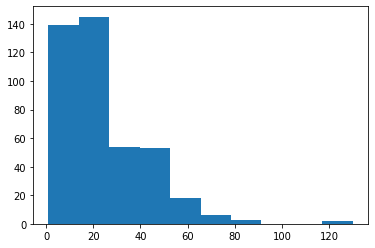

In [79]:
plt.hist(employee_work.loc[idx[4]]['Quantity'])

(array([35., 40., 15., 12.,  9.,  2.,  1.,  0.,  2.,  1.]),
 array([  2. ,  13.8,  25.6,  37.4,  49.2,  61. ,  72.8,  84.6,  96.4,
        108.2, 120. ]),
 <a list of 10 Patch objects>)

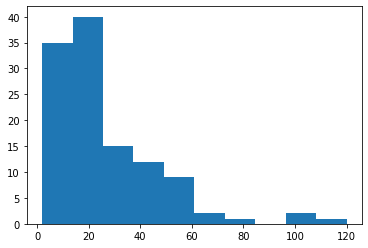

In [80]:
plt.hist(employee_work.loc[idx[5]]['Quantity'])

(array([60., 64., 32.,  5.,  3.,  2.,  1.,  0.,  0.,  1.]),
 array([  2. ,  14.8,  27.6,  40.4,  53.2,  66. ,  78.8,  91.6, 104.4,
        117.2, 130. ]),
 <a list of 10 Patch objects>)

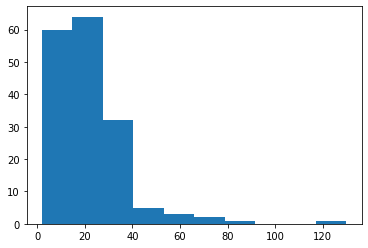

In [81]:
plt.hist(employee_work.loc[idx[6]]['Quantity'])

(array([48., 53., 38., 12., 15.,  3.,  2.,  1.,  3.,  1.]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]),
 <a list of 10 Patch objects>)

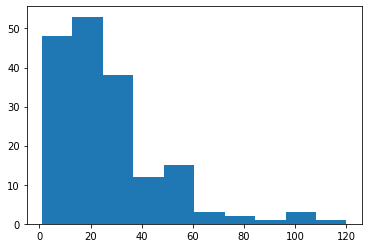

In [82]:
plt.hist(employee_work.loc[idx[7]]['Quantity'])

(array([73., 93., 44., 18., 17.,  5.,  4.,  3.,  1.,  2.]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <a list of 10 Patch objects>)

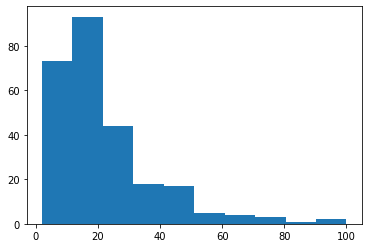

In [83]:
plt.hist(employee_work.loc[idx[8]]['Quantity'])

(array([26., 34., 17., 17.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([  1. ,  11.9,  22.8,  33.7,  44.6,  55.5,  66.4,  77.3,  88.2,
         99.1, 110. ]),
 <a list of 10 Patch objects>)

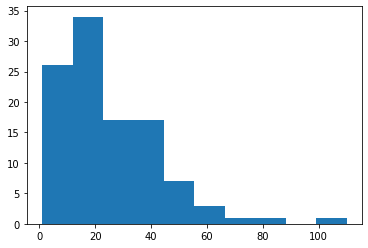

In [84]:
plt.hist(employee_work.loc[idx[9]]['Quantity'])

[(array([322.,  19.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
  array([1.000e+01, 1.590e+03, 3.170e+03, 4.750e+03, 6.330e+03, 7.910e+03,
         9.490e+03, 1.107e+04, 1.265e+04, 1.423e+04, 1.581e+04]),
  <a list of 10 Patch objects>),
 (array([217.,  18.,   1.,   2.,   2.,   0.,   0.,   0.,   0.,   1.]),
  array([4.800000e+00, 1.585320e+03, 3.165840e+03, 4.746360e+03,
         6.326880e+03, 7.907400e+03, 9.487920e+03, 1.106844e+04,
         1.264896e+04, 1.422948e+04, 1.581000e+04]),
  <a list of 10 Patch objects>),
 (array([259.,  45.,  10.,   3.,   0.,   0.,   1.,   2.,   0.,   1.]),
  array([9.60000e+00, 9.98960e+02, 1.98832e+03, 2.97768e+03, 3.96704e+03,
         4.95640e+03, 5.94576e+03, 6.93512e+03, 7.92448e+03, 8.91384e+03,
         9.90320e+03]),
  <a list of 10 Patch objects>),
 (array([363.,  40.,  11.,   3.,   1.,   0.,   0.,   1.,   0.,   1.]),
  array([7.30000e+00, 1.06057e+03, 2.11384e+03, 3.16711e+03, 4.22038e+03,
         5.27365e+03, 6.32692e+03, 7.38019e+03,

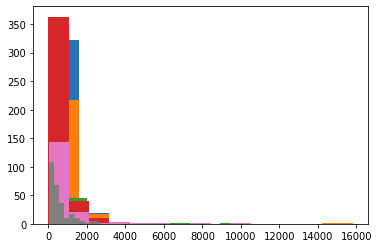

In [85]:
[plt.hist(employee_work.loc[idx[x]]['ItemTotal']) for x in range(1,9)]

### Tools for use of discovered information

In [86]:
# function or equation used to test developed theories
pass

# Future Work

give a list of options for future exploration opportunities

# Resources

Measure skewness https://towardsdatascience.com/understanding-measures-of-variance-with-python-f57d59617a0b
Lat/Long: https://www.latlong.net/